# Imported Required Libraries:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from time import time
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Loaded Training Data:

In [11]:
train_data = pd.read_csv('D:\ML\DL Repo\JOB-A-THON - January 2023\\train_BRCpofr.csv')

# Checking Training Data (Column names and it's values)

In [12]:
train_data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,0,1,2,2,1,5,5790,2,2,2,64308
1,0,0,1,2,0,8,5080,2,2,2,515400
2,0,1,2,2,1,8,2599,2,2,2,64212
3,1,0,1,2,0,7,0,2,2,2,97920
4,0,1,1,3,1,6,3508,2,2,1,59736


# Created valriable to store input data column names:

In [18]:
x_column_names = {'gender','area','qualification','income','marital_status','vintage','claim_amount','num_policies','policy','type_of_policy'}

# Checking training data and it's type and missing values

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          89392 non-null  int64
 1   area            89392 non-null  int64
 2   qualification   89392 non-null  int64
 3   income          89392 non-null  int64
 4   marital_status  89392 non-null  int64
 5   vintage         89392 non-null  int64
 6   claim_amount    89392 non-null  int64
 7   num_policies    89392 non-null  int64
 8   policy          89392 non-null  int64
 9   type_of_policy  89392 non-null  int64
 10  cltv            89392 non-null  int64
dtypes: int64(11)
memory usage: 7.5 MB


In [14]:
train_data.isnull().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

# Checkign relationship between Input and Target data:

<AxesSubplot:>

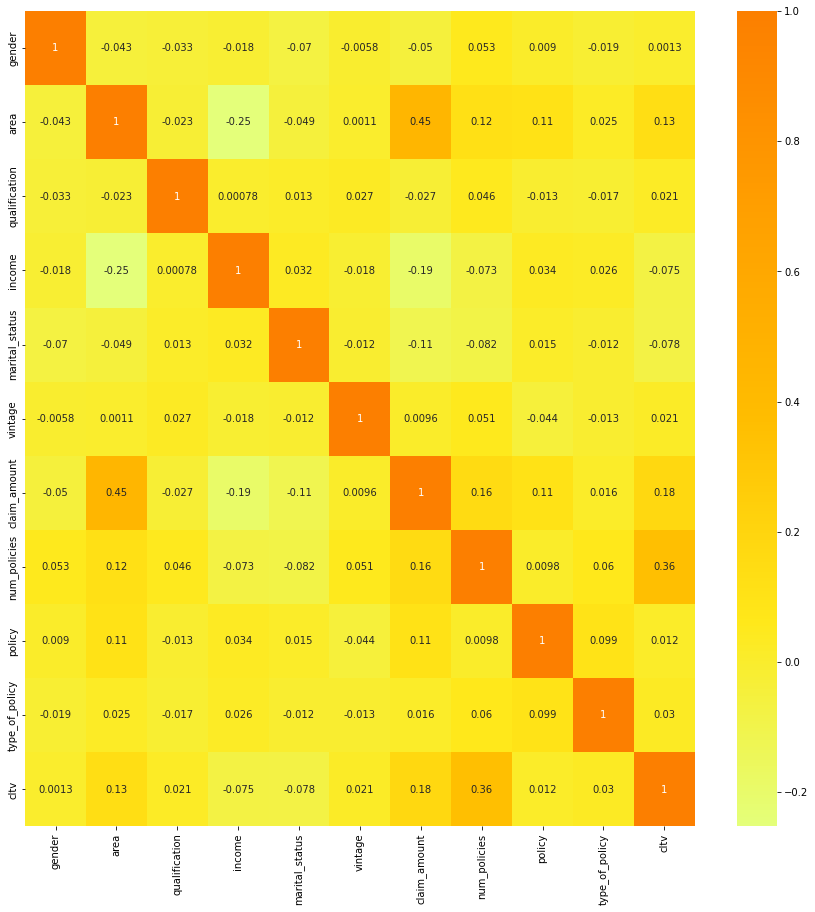

In [65]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),cmap='Wistia',annot=True)

In [20]:
train_x = train_data[x_column_names]
train_x.head()

C:\Users\mckni\AppData\Local\Temp\ipykernel_14796\922067464.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_x = train_data[x_column_names]


,claim_amount,marital_status,qualification,income,type_of_policy,area,gender,policy,vintage,num_policies
0,5790,1,2,2,2,1,0,2,5,2
1,5080,0,1,2,2,0,0,2,8,2
2,2599,1,2,2,2,1,0,2,8,2
3,0,0,1,2,2,0,1,2,7,2
4,3508,1,1,3,1,1,0,2,6,2


In [22]:
train_x_np = np.array(train_x)
train_x_np[:5]

array([[5790,    1,    2,    2,    2,    1,    0,    2,    5,    2],
       [5080,    0,    1,    2,    2,    0,    0,    2,    8,    2],
       [2599,    1,    2,    2,    2,    1,    0,    2,    8,    2],
       [   0,    0,    1,    2,    2,    0,    1,    2,    7,    2],
       [3508,    1,    1,    3,    1,    1,    0,    2,    6,    2]],
      dtype=int64)

In [21]:
train_y = train_data['cltv']
train_y.head()

0     64308
1    515400
2     64212
3     97920
4     59736
Name: cltv, dtype: int64

In [23]:
train_y_np = np.array(train_y)
train_y_np[:5]

array([ 64308, 515400,  64212,  97920,  59736], dtype=int64)

# Spliting training data to use for both training & validating the model:

In [174]:
X_train,X_test,Y_train,Y_test = train_test_split(train_data[list(['gender','area','qualification','income','marital_status','vintage','claim_amount','num_policies','policy','type_of_policy'])],train_data['cltv'],test_size = 0.3,random_state = 1)

In [175]:
X_train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
52720,0,1,1,2,1,1,5411,2,2,2
3377,0,0,2,2,1,8,2888,2,2,1
18542,1,1,1,2,1,6,3573,2,1,2
23573,0,1,2,1,1,6,0,1,1,2
22339,1,0,2,3,0,4,0,1,2,1


In [176]:
Y_train.head()

52720    337872
3377     470328
18542     64524
23573     44904
22339     33300
Name: cltv, dtype: int64

# Scaling input data (claim_amount):

In [177]:
X_mms = MinMaxScaler()
claim_amount_train = X_mms.fit_transform(np.array(X_train['claim_amount']).reshape(-1,1))
claim_amount_test = X_mms.transform(np.array(X_test['claim_amount']).reshape(-1,1))
claim_amount_train[:5]

array([[0.16965573],
       [0.09054995],
       [0.11202734],
       [0.        ],
       [0.        ]])

# Scaling target data (cltv):

In [182]:
Y_mms = MinMaxScaler()
cltv_train = Y_mms.fit_transform(np.array(Y_train).reshape(-1,1))
cltv__test = Y_mms.transform(np.array(Y_test).reshape(-1,1))
cltv_train[:5]

array([[0.44769178],
       [0.6371203 ],
       [0.05677021],
       [0.02871117],
       [0.01211601]])

# Training variables are updated as per scaled data:

In [186]:
X_train['claim_amount'] = claim_amount_train
X_test['claim_amount'] = claim_amount_test
X_train['claim_amount'].head()

52720    0.169656
3377     0.090550
18542    0.112027
23573    0.000000
22339    0.000000
Name: claim_amount, dtype: float64

In [189]:
Y_train = cltv_train
Y_test = cltv__test
Y_train[:5]

array([[0.44769178],
       [0.6371203 ],
       [0.05677021],
       [0.02871117],
       [0.01211601]])

# Spliting training data to be used for both training & validating the model:

In [190]:
X_train_np,X_test_np,Y_train_np,Y_test_np = np.array(X_train),np.array(X_test),np.array(Y_train),np.array(Y_test)

In [32]:
model_1 = LinearRegression()

In [33]:
model_1.fit(X_train_np,Y_train_np)

LinearRegression()

In [34]:
y_pred = model_1.predict(X_test_np)

In [35]:
np.sqrt(mean_squared_error(Y_test_np,y_pred))

82670.009297251

In [36]:
model_1.score(X_test_np,Y_test_np)

0.14965348963349334

In [95]:
X_train_np.shape

(62574, 10)

# Looping through Regression models

In [42]:
regressors = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
]

In [196]:
head = 10
for model in regressors:
    start = time()
    model.fit(X_train_np, Y_train_np)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test_np)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_test_np, y_pred))
    print("\tMean squared error:", mean_squared_error(Y_test_np, y_pred))
    print("\tR2 score:", r2_score(Y_test_np, y_pred))
    print("\score:",model.score(X_test_np,Y_test_np))
    print()

C:\Users\mckni\AppData\Local\Temp\ipykernel_14796\2582568822.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_np, Y_train_np)


RandomForestRegressor()
	Training time: 12.052s
	Prediction time: 0.654s
	Explained variance: 0.03179706128759774
	Mean squared error: 0.015972916189655052
	R2 score: 0.02828993307108396
\score: 0.02828993307108396



D:\Anaconda\envs\GPU\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()
	Training time: 3.082s
	Prediction time: 0.031s
	Explained variance: 0.16035911745448572
	Mean squared error: 0.013802224283127773
	R2 score: 0.16034366406979583
\score: 0.16034366406979583

DecisionTreeRegressor()
	Training time: 0.188s
	Prediction time: 0.010s
	Explained variance: -0.8228154278814372
	Mean squared error: 0.0300348323813184
	R2 score: -0.8271647228920918
\score: -0.8271647228920918

LinearRegression()
	Training time: 0.008s
	Prediction time: 0.000s
	Explained variance: 0.14966119546443413
	Mean squared error: 0.013977948777640347
	R2 score: 0.1496534896334928
\score: 0.1496534896334928

Lasso()
	Training time: 0.006s
	Prediction time: 0.000s
	Explained variance: 0.0
	Mean squared error: 0.016438746160450518
	R2 score: -4.876643278750592e-05
\score: -4.876643278750592e-05

Ridge()
	Training time: 0.004s
	Prediction time: 0.000s
	Explained variance: 0.1496650384596767
	Mean squared error: 0.01397788553421765
	R2 score: 0.1496573370380475
\sco

# DNN - Model Test

In [152]:
from keras.models import Sequential
from keras.layers import Activation,Add,Dense,Conv1D,MaxPooling1D,AveragePooling1D,Flatten,GlobalMaxPooling1D,Dropout,BatchNormalization,Input,Activation,GlobalAveragePooling1D
from keras import callbacks
from tensorflow.keras.utils import to_categorical

In [153]:
import tensorflow as tf

In [208]:
DL_model = Sequential()
DL_model.add(Dense(256, input_shape=(10,), activation='relu'))
DL_model.add(Dropout(0.2))
DL_model.add(Dense(128, activation='relu'))
DL_model.add(Dropout(0.2))
DL_model.add(Dense(64, activation='relu'))
DL_model.add(Dropout(0.2))
DL_model.add(Dense(1, activation='linear'))

In [209]:
DL_model.compile(loss='mse', optimizer='adam', metrics='acc')

In [210]:
DL_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 256)               2816      
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_58 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_60 (Dense)            (None, 1)               

In [211]:
DL_model.fit(X_train_np,Y_train_np,validation_data = (X_test_np,Y_test_np),batch_size = 1000, epochs = 10)

Epoch 1/10
63/63 [==============================] - 1s 6ms/step - loss: 0.0367 - acc: 1.5981e-05 - val_loss: 0.0167 - val_acc: 0.0000e+00
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0172 - acc: 1.5981e-05 - val_loss: 0.0152 - val_acc: 0.0000e+00
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0161 - acc: 1.5981e-05 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0156 - acc: 1.5981e-05 - val_loss: 0.0149 - val_acc: 0.0000e+00
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0154 - acc: 1.5981e-05 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0152 - acc: 1.5981e-05 - val_loss: 0.0147 - val_acc: 0.0000e+00
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0151 - acc: 1.5981e-05 - val_loss: 0.0150 - val_acc: 0.0000e+00
Epoch 8/10
63/63 [================

In [199]:
model_decision_tree  = DecisionTreeRegressor()

In [201]:
model_decision_tree.fit(X_train_np,Y_train_np)

DecisionTreeRegressor()

In [202]:
y_pred_2 = model_decision_tree.predict(X_test_np)

In [203]:
np.sqrt(mean_squared_error(Y_test_np,y_pred_2))

0.17314822998618162

In [204]:
model_decision_tree.score(X_test_np,Y_test_np)

-0.82384783410248